# Seaborn For Engineers

**Index:**

0. Setup  
1. Import Data  
2. **Distribution Plots**
3. Styling  
4. **Categorical Plots**  
5. Palettes  
6. **Matrix Plots**  
7. **Regression Plots**  

This notebook provides a comprehensive walkthrough of data visualization techniques using Seaborn and Matplotlib. It explores the analysis of various built-in datasets such as car_crashes, tips, and iris. The notebook covers a range of visualization types including histograms, joint plots, KDE plots, pair plots, categorical plots, matrix plots, and regression plots. Each section demonstrates practical applications of these plots for effective data exploration and presentation, offering insights into different statistical relationships and distributions within the data.

**Attribution**: https://www.youtube.com/watch?v=6GUZXDef2U0&ab_channel=DerekBanas

## 0. Setup

In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting and autoreload for Jupyter Notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## 1. Import Data

We will use the `car_crashes.csv` dataset, it belongs to the Seaborn Examples repository. This dataset offers state-level information on driving-related behaviors and insurance metrics. Each row represents a U.S. state (identified by its two-letter abbreviation in the "abbrev" column) and includes several numeric variables that can be analyzed individually or in relation to one another. Here’s a breakdown of its components:

- **total** (`float`): Total number of fatal accidents per 100,000 people.
- **speeding** (`float`): Percentage of fatal accidents caused by speeding.
- **alcohol** (`float`): Percentage of fatal accidents caused by alcohol impairment.
- **not_distracted** (`float`): Percentage of fatal accidents where distraction was not a factor.
- **no_previous** (`float`): Percentage of drivers in fatal accidents with no previous incidents.
- **ins_premium** (`float`): Average insurance premium (in dollars).
- **ins_losses** (`float`): Average insurance losses (in dollars).
- **abbrev** (`string`): Two-letter state abbreviation.

In [38]:
# Seaborn provides built in datasets
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [39]:
# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## 2. Distribution Plots
Distribution plots are powerful visualization tools for understanding how data is distributed across a range of values. These plots provide insights into the underlying patterns, central tendencies, and spread of data, which are essential for effective exploratory data analysis. This section covers several key types of distribution plots available in Seaborn:

- **Histograms**: Visualizes the frequency distribution of a dataset by dividing the data into bins
- **Joint Plots**: Combines scatter plots with univariate distributions on the margins
- **KDE (Kernel Density Estimation) Plots**: Creates smooth curves to represent the probability density function of the data
- **Pair Plots**: Displays the pairwise relationships between multiple variables in a dataset
- **Rug Plots**: Shows the marginal distributions by placing small tick marks along the axes

These visualization techniques help identify important characteristics such as multimodality, skewness, outliers, and the overall shape of distributions. When used together, they provide complementary perspectives on your data's underlying structure and relationships.


### 2.1 Histogram Plot

The `seaborn.histplot` is a versatile tool for visualizing data distributions. It aggregates continuous data into discrete bins, providing a clear view of frequency distributions. The function supports both:

- **Univariate Analysis:** Displays the distribution of a single variable.
- **Bivariate Analysis:** When both `x` and `y` parameters are provided, it reveals insights into the relationship between two variables.

For more details, refer to the [seaborn.histplot documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html).

<Axes: xlabel='not_distracted', ylabel='Count'>

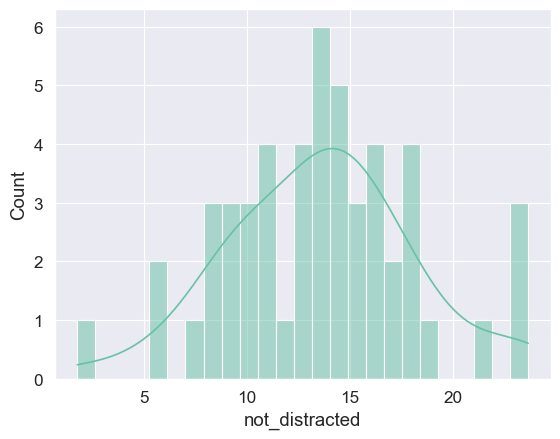

In [40]:
# Bins define the number of ranges of continuous values used to group values in the chart
# KDE compute a kernel density estimate to smooth the distribution 
sns.histplot(crash_df['not_distracted'], kde=True, bins=25)

<Axes: xlabel='not_distracted', ylabel='Count'>

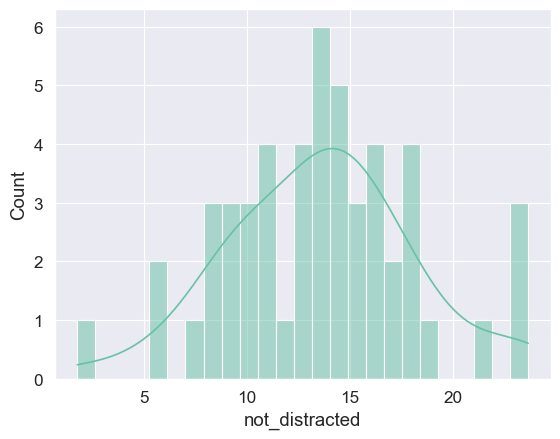

In [41]:
# The plotted variable can also be defined within the axis
sns.histplot(crash_df, x='not_distracted', kde=True, bins=25)

<Axes: xlabel='speeding', ylabel='alcohol'>

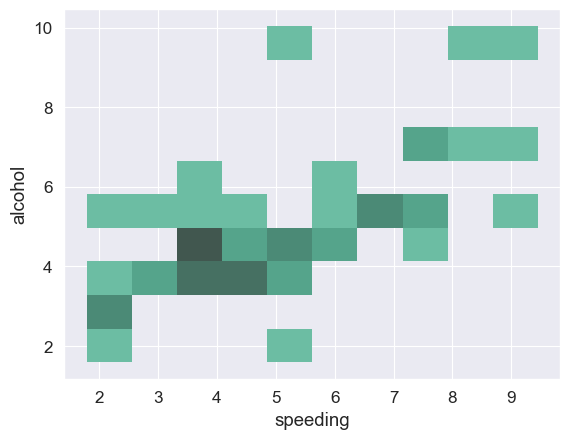

In [42]:
sns.histplot(crash_df, x='speeding', y='alcohol', bins=10) #bivariate bin-based joint distribution , positive correlation between drinking and speeding

### 2.2 Joint Plot

The `sns.jointplot` is a powerful tool for exploratory data analysis that combines two types of plots into one figure:
- **Marginal distributions** (along the top and right margins)
- **Joint distribution** on the central part of the plot showing the relationship between the two variables

We can tailor the joint plot with the kink argument

`kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }`

- Setting `kind="kde"` will draw both bivariate and univariate KDEs:
- Set `kind="reg"` to add a linear regression fit (using regplot()) and univariate KDE curves
- There are also two options for bin-based visualization of the joint distribution. The first, with `kind="hist"`, uses histplot() on all of the axes
- Alternatively, setting `kind="hex"` will use matplotlib.axes.Axes.hexbin() to compute a bivariate histogram using hexagonal bins:

For more details, refer to the [seaborn.jointplot documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

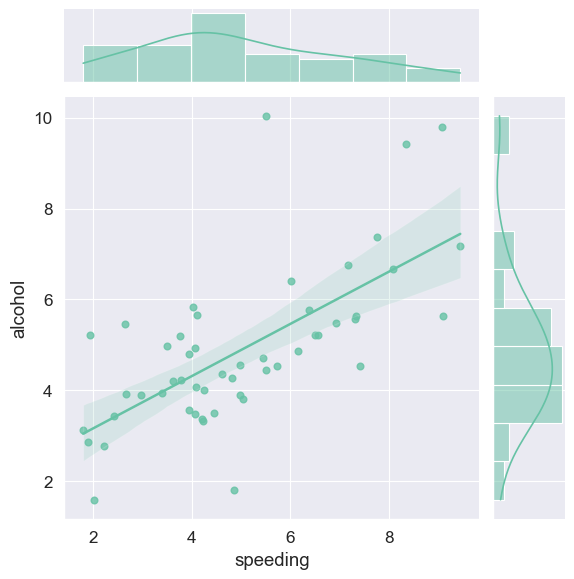

In [43]:
sns.jointplot(crash_df, x='speeding', y='alcohol', kind='reg')

### 2.3 KDE Plot

The `seaborn.kdeplot` function generates a Kernel Density Estimate (KDE) plot, providing a smooth, continuous approximation of a variable's probability density function. This method offers a refined alternative to histograms, enabling clearer visualization of the underlying distribution, potential modes, and outlier presence.

For more details, refer to the [seaborn.kdeplot documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

<Axes: xlabel='alcohol', ylabel='Density'>

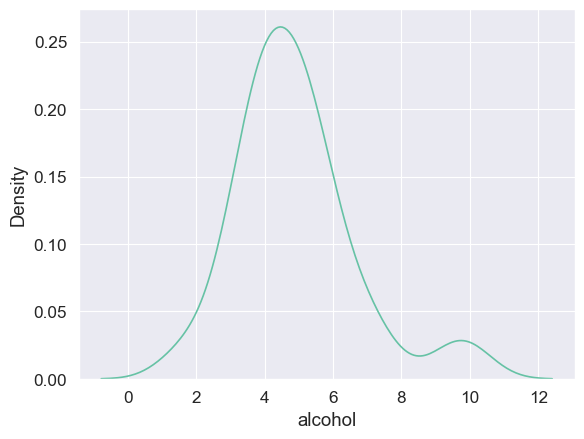

In [44]:
sns.kdeplot(crash_df['alcohol'])

### 2.4 Pair Plots

The `seaborn.pairplot` function offers a comprehensive overview of pairwise relationships in a dataset by generating a grid of bivariate scatter plots and univariate distribution plots. This tool is ideal for identifying correlations, patterns, and potential outliers among numerical features.

For more details, refer to the [seaborn pairplot documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

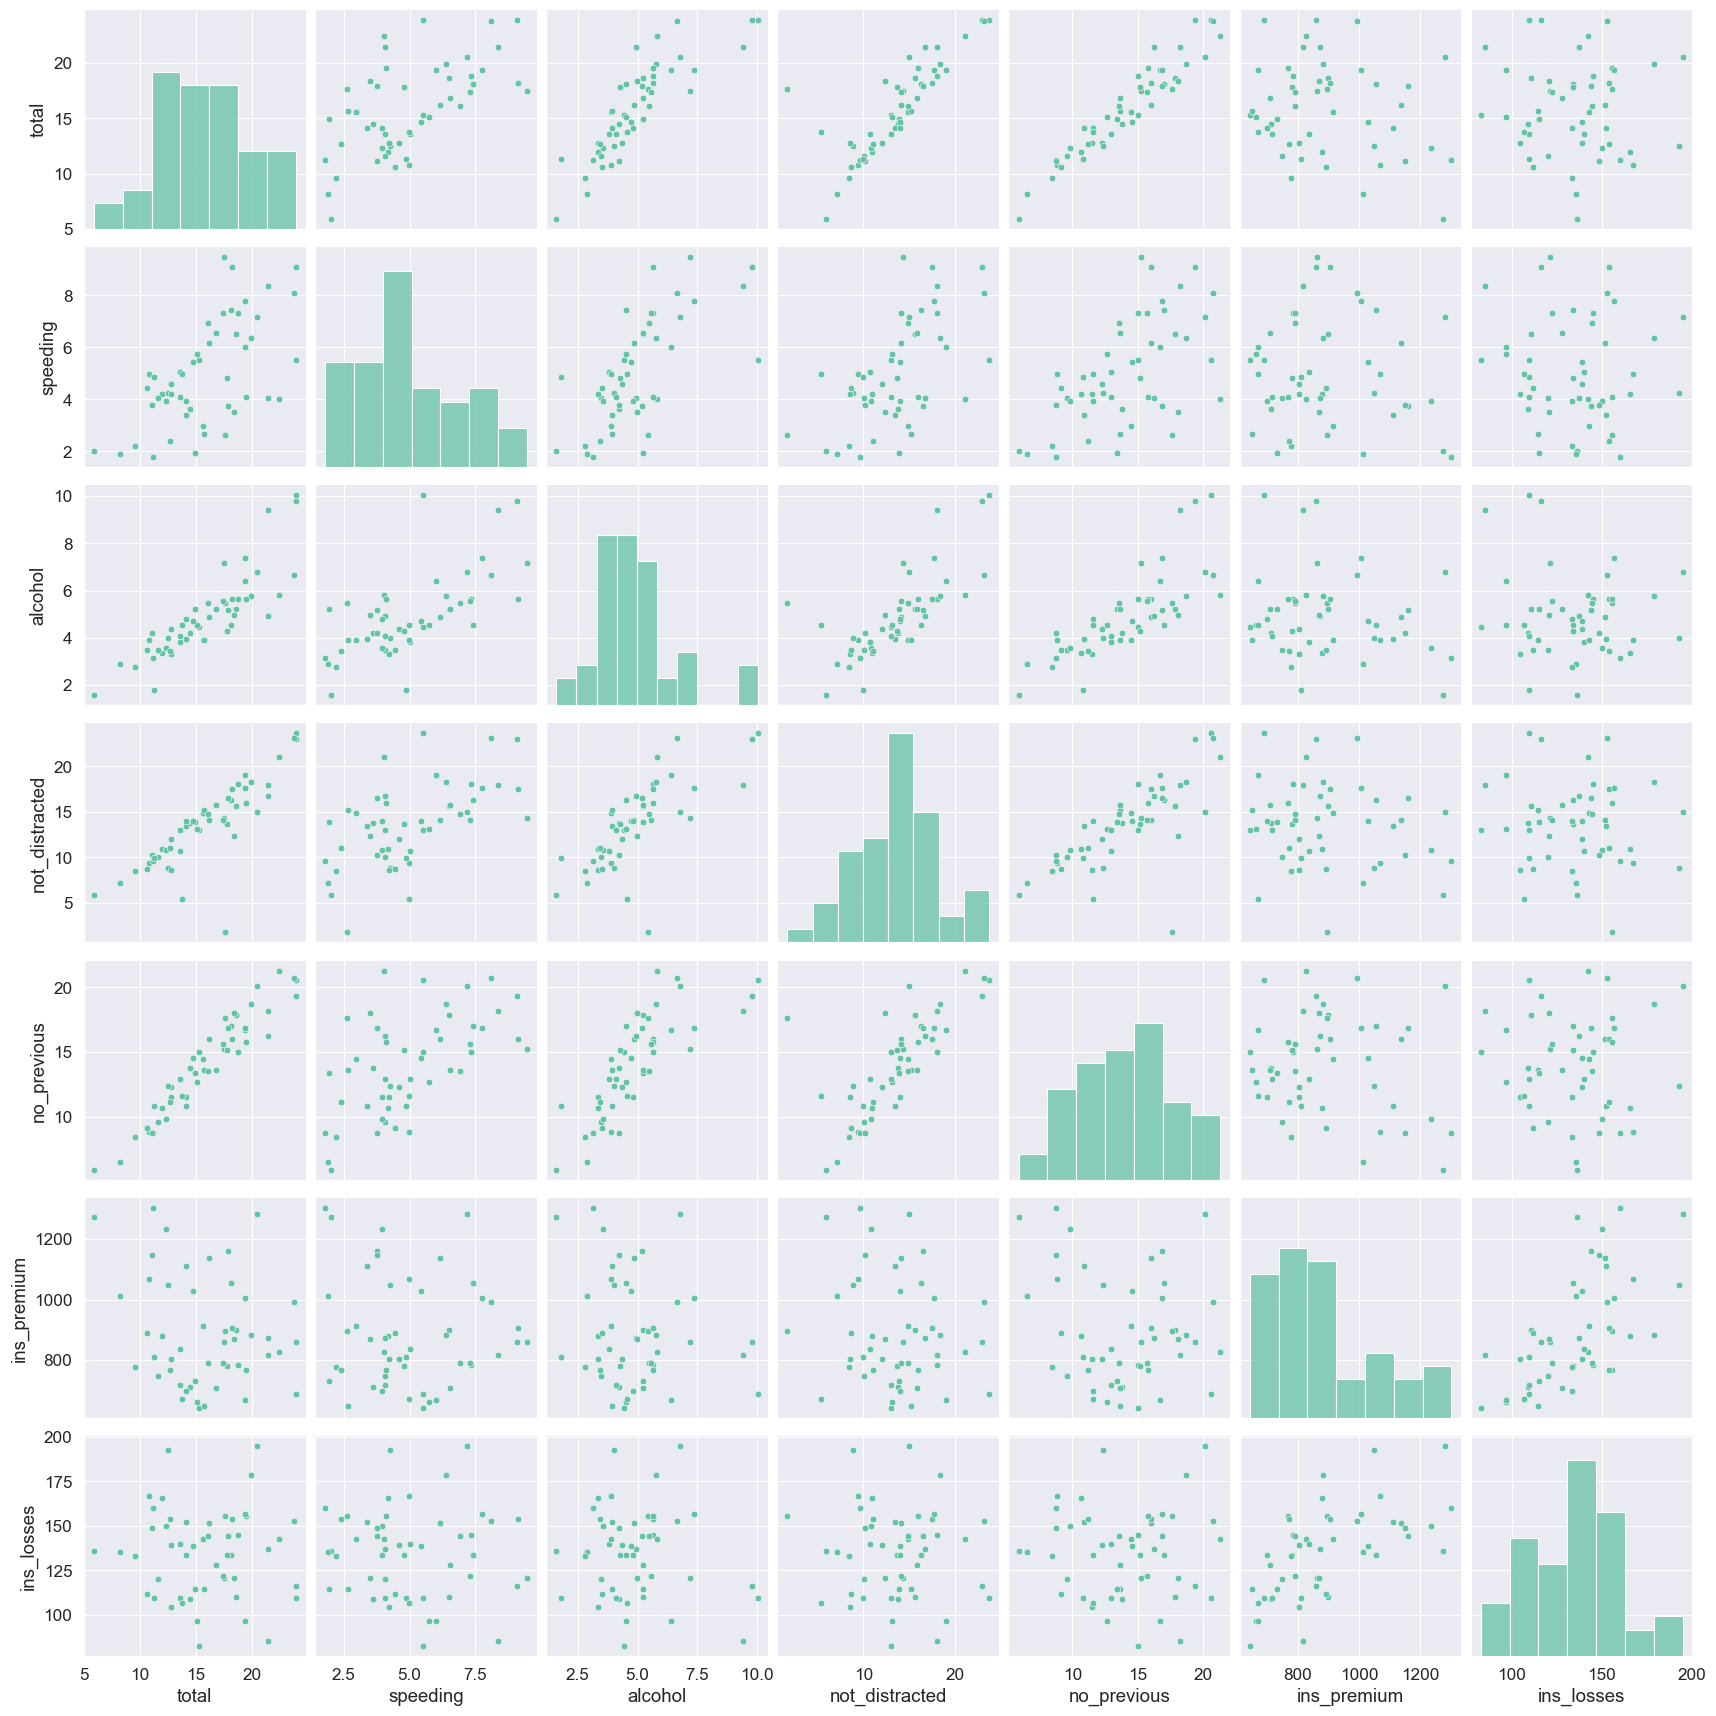

In [45]:
sns.pairplot(crash_df)

Lets present the  `tips.csv` dataset, it belongs to the Seaborn Examples repository. This dataset contains information about restaurant bills, including total bill amounts, tips, customer demographics, and dining details.

- **total_bill** (`float`): Total cost of the meal (in dollars).
- **tip** (`float`): Tip amount given (in dollars).
- **sex** (`string`): Gender of the bill payer (`Male` or `Female`).
- **smoker** (`string`): Whether the customer is a smoker (`Yes` or `No`).
- **day** (`string`): Day of the week (`Thur`, `Fri`, `Sat`, `Sun`).
- **time** (`string`): Meal time (`Lunch` or `Dinner`).
- **size** (`int`): Number of people in the dining party.

In [46]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


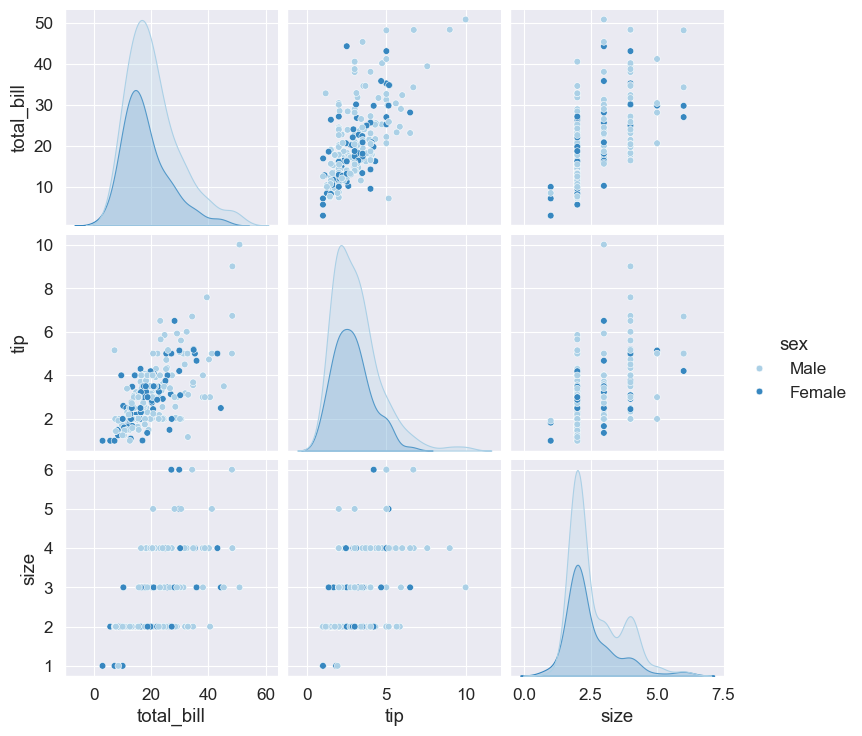

In [47]:
sns.pairplot(tips_df, hue="sex", palette="Blues")

### 2.5 Rug Plot

The `seaborn.rugplot` function provides a concise visualization of the marginal distributions by placing small tick marks along the axes, effectively highlighting the positions of individual data observations. This plot is best used as a complement to other visualizations to give additional insight into the underlying data distribution.

For more details, refer to the [seaborn.rugplot documentation](https://seaborn.pydata.org/generated/seaborn.rugplot.html).

<Axes: xlabel='tip', ylabel='Density'>

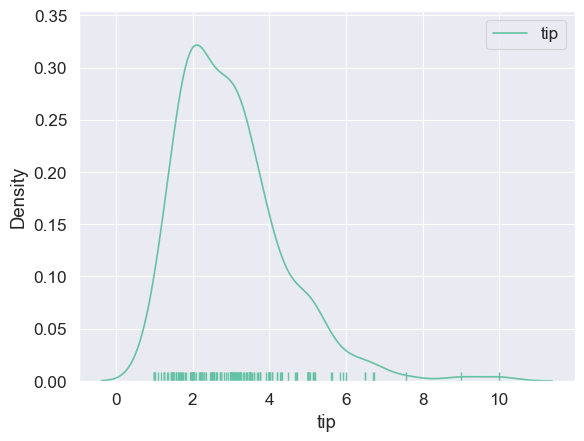

In [48]:
sns.kdeplot(tips_df['tip'])
sns.rugplot([tips_df['tip']]) #always the rugplot at the end

## 3. Styling
Styling in Seaborn allows you to customize the visual aesthetics of your plots to enhance readability, focus attention, and create publication-quality visualizations. Seaborn offers a range of styling functions that provide fine control over the appearance of your plots beyond the default Matplotlib settings.

Key styling components in Seaborn include:

- **Plot Styles**: Control the overall look and feel of plots using themes like `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks` via `sns.set_style()`
- **Contexts**: Adjust plot scale parameters for different output mediums (paper, notebook, talk, poster) using `sns.set_context()`
- **Color Palettes**: Apply predefined or custom color schemes for better visual distinction using functions like `sns.set_palette()`
- **Figure Sizing**: Control dimensions through Matplotlib's `plt.figure(figsize=(width, height))`
- **Spine Manipulation**: Remove unnecessary chart borders with `sns.despine()` for cleaner visuals
- **Font Scaling**: Adjust text sizes across plots with the `font_scale` parameter

These styling options allow you to create consistent and visually appealing plots that effectively communicate your data insights while matching your presentation requirements.

<Figure size 800x400 with 0 Axes>

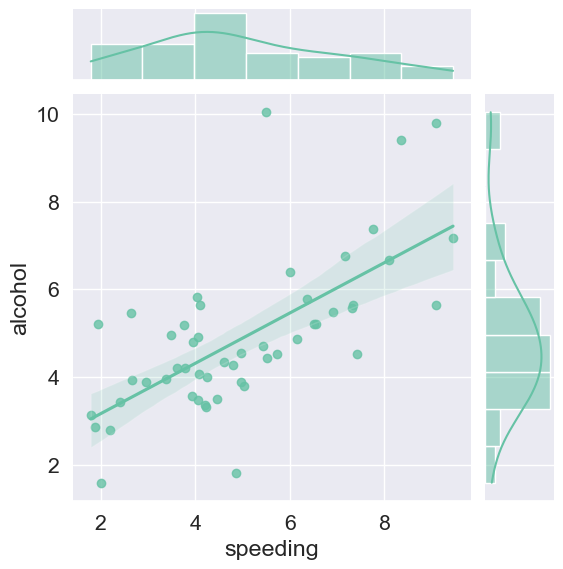

In [49]:
sns.set_style('darkgrid')

plt.figure(figsize=(8,4))

sns.set_context('notebook', font_scale=1.4)

sns.jointplot(crash_df, x="speeding", y="alcohol", kind="reg")

sns.despine(left=True) #use with white style

## 4. Categorical Plots
Categorical plots are visualization tools designed to analyze relationships between categorical variables and numerical data. These plots are essential for understanding patterns, distributions, and comparisons across different categories or groups.

This section covers six powerful categorical visualization techniques in Seaborn:

- **Bar Plots**: Display point estimates and confidence intervals using rectangular bars
- **Count Plots**: Show the frequency of observations in each categorical bin
- **Box Plots**: Visualize the distribution of data through quartiles, highlighting outliers
- **Violin Plots**: Combine box plot information with kernel density estimates to show distribution shape
- **Strip Plots**: Present individual data points in a categorical scatterplot format
- **Swarm Plots**: Display all data points in a non-overlapping arrangement for better distribution visualization

These plots provide complementary perspectives on categorical relationships, allowing for comprehensive data exploration and effective communication of findings. Each technique offers unique advantages for different analytical scenarios and data characteristics.

### 4.1 Bar Plots

The `seaborn.barplot` show point estimates and errors as rectangular bars. A bar plot represents an aggregate or statistical estimate for a numeric variable with the height of each rectangle and indicates the uncertainty around that estimate using an error bar. Bar plots include 0 in the axis range, and they are a good choice when 0 is a meaningful value for the variable to take. The black stick represents the variability with an confidence interval of .95

For more details, refer to the [Seaborn Barplot Documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html).

<Axes: xlabel='sex', ylabel='total_bill'>

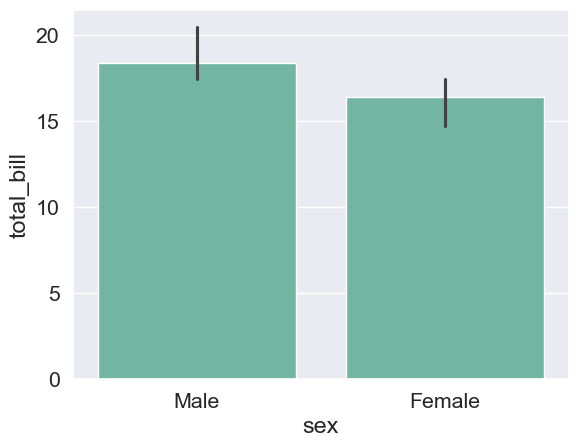

In [50]:
sns.barplot(tips_df, x='sex', y = "total_bill", estimator=np.median)

### 4.2 Count Plot

The `seaborn.countplot` function creates bar plots showing the frequency of observations in each categorical bin. Count plots are essentially histograms for categorical variables instead of numerical ones, providing a quick visual summary of the distribution across different categories.

For more details, refer to the [Seaborn Countplot Documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html).

<Axes: xlabel='sex', ylabel='count'>

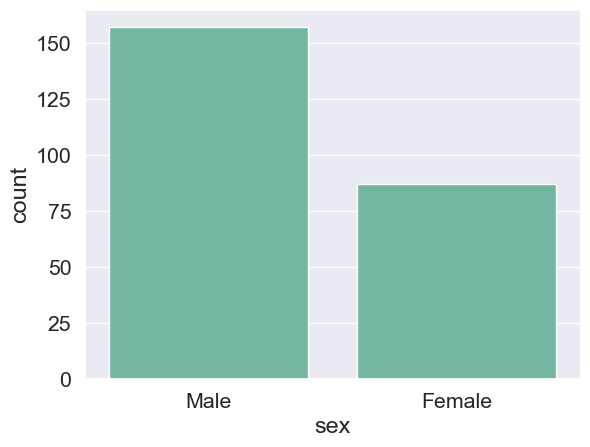

In [51]:
sns.countplot(tips_df, x='sex')

### 4.3 Box-and-Whisker Plot

The `seaborn.boxplot` function creates a visual representation of data distribution through quartiles, highlighting statistical properties and potential outliers. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.

The box displays the interquartile range (IQR) with:
- The lower edge (bottom) representing the first quartile (25th percentile)
- The central line marking the median (50th percentile)
- The upper edge (top) showing the third quartile (75th percentile)

The whiskers extend from the box to indicate variability outside the quartiles, with points beyond the whiskers typically considered outliers. Box plots are particularly useful for identifying skewness, comparing distributions across groups, and detecting potential outliers in your data.

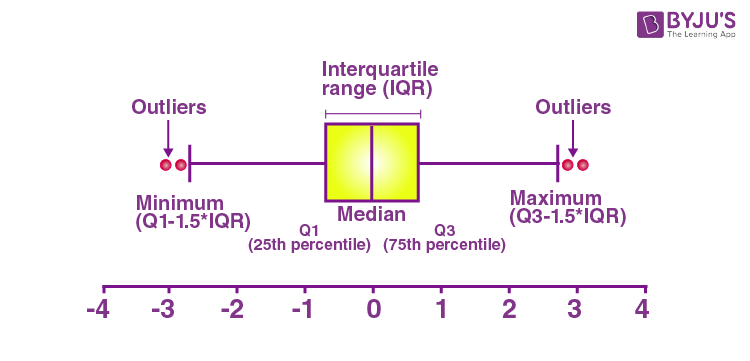

For more details, refer to the [Seaborn Boxplot Documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

<Axes: xlabel='day', ylabel='total_bill'>

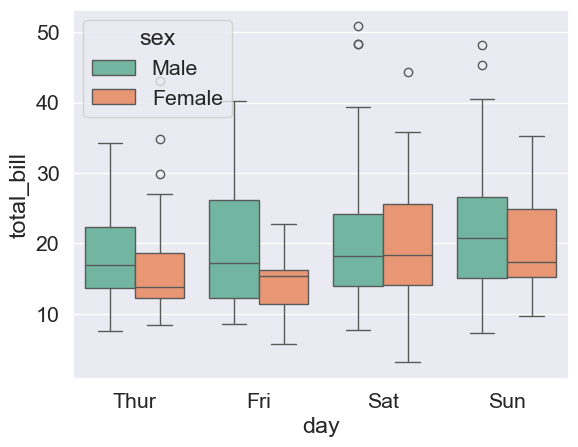

In [52]:
sns.boxplot(tips_df, x='day', y='total_bill', hue='sex')

### 4.4 Violin Plot

The `seaborn.violinplot` function combines box plot elements with kernel density estimation to display distribution shapes across categories. While similar to box plots in showing statistical summaries, violin plots provide richer visualization of the underlying distribution by representing the probability density at different values. The width of each "violin" indicates where the data is concentrated, making it particularly effective for comparing distributions across multiple categories.

For more details, refer to the [Seaborn Violinplot Documentation](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

<Axes: xlabel='day', ylabel='total_bill'>

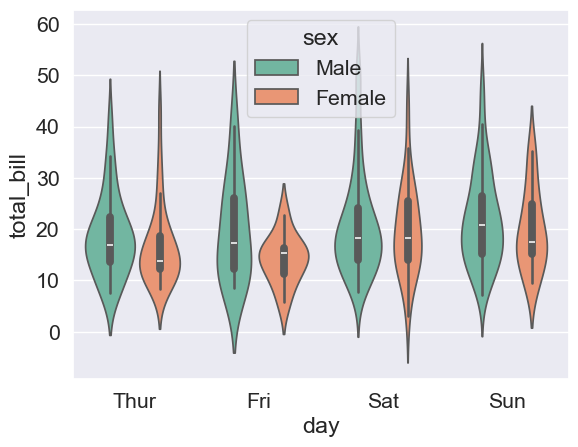

In [53]:
sns.violinplot(tips_df, x='day', y='total_bill', hue='sex')

### 4.5 Strip Plot

The `seaborn.stripplot` draws a categorical scatterplot using jitter to reduce overplotting. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

- `jitter=True` will spread the points not to be on a line
- `dodge=True` will separate the points by the hue variable

For more details, refer to the [Seaborn Violinplot Documentation](https://seaborn.pydata.org/generated/seaborn.stripplot.html).

<Axes: xlabel='day', ylabel='total_bill'>

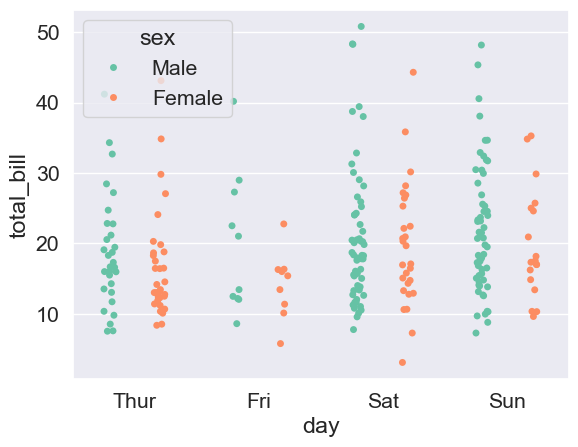

In [54]:
sns.stripplot(tips_df, x='day', y='total_bill', jitter=True, hue='sex', dodge=True)

### 4.6 Swarm Plot

The `seaborn.swarmplot` function creates categorical scatter plots with non-overlapping points, showing the distribution of individual observations. Unlike standard strip plots, swarm plots adjust point positions along the categorical axis to eliminate overlap, providing a clearer representation of data distribution and density. This visualization style, sometimes called a "beeswarm," is particularly useful for smaller datasets as it allows you to see every data point while still understanding the underlying distribution. Swarm plots can stand alone or complement box and violin plots when you want to display all observations alongside distribution summaries.

For more details, refer to the [Seaborn Swarmplot Documentation](https://seaborn.pydata.org/generated/seaborn.swarmplot.html).

<Axes: xlabel='day', ylabel='total_bill'>

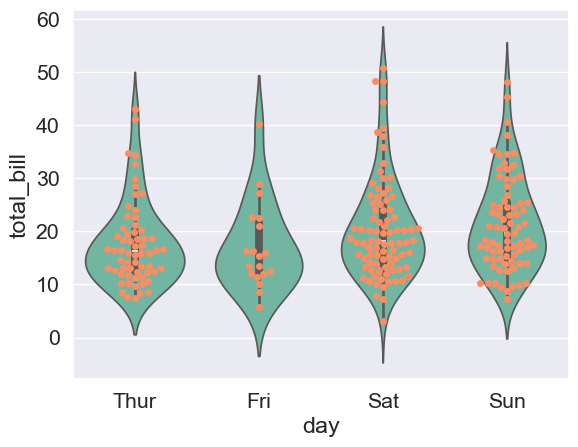

In [55]:
sns.violinplot(tips_df, x='day', y='total_bill')
sns.swarmplot(tips_df, x='day', y='total_bill')

## 5. Palettes

Color palettes in Seaborn provide a powerful way to enhance visualizations through thoughtful use of color. Effective color choices can highlight patterns, emphasize important data points, distinguish categories, and improve overall readability. Seaborn offers several types of color palettes designed for different data visualization needs:

### Types of Color Palettes

- **Sequential Palettes**: Vary smoothly from low to high values using light-to-dark or low-to-high saturation transitions. Ideal for displaying ordered data or continuous variables.
    - Examples: `"Blues"`, `"Greens"`, `"Reds"`, `"viridis"`, `"rocket"`

- **Diverging Palettes**: Feature two sequential palettes with different hues that share a common light or dark point. Perfect for data with a meaningful midpoint or zero value.
    - Examples: `"RdBu"`, `"BrBG"`, `"coolwarm"`, `"vlag"`

- **Categorical Palettes**: Use distinct colors to represent different categories without implying order. Designed for nominal data where perceptual differences matter.
    - Examples: `"Set1"`, `"Set2"`, `"Paired"`, `"deep"`, `"pastel"`

Thoughtful palette selection enhances the effectiveness of your visualizations, making them both more aesthetically pleasing and more informative.

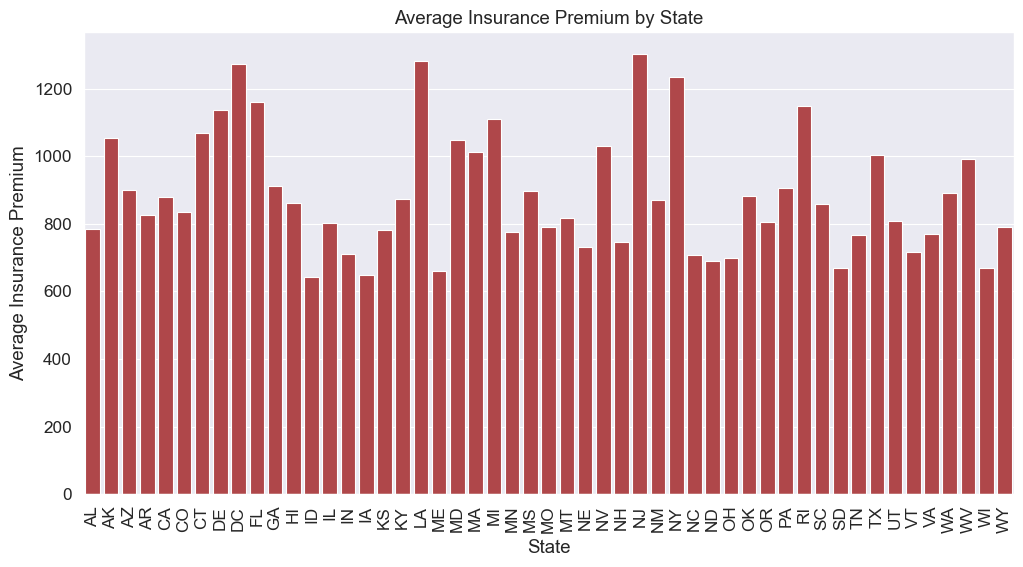

In [64]:
# Set the color palette to "coolwarm"
sns.set_palette("RdBu")

# Create a bar plot to visualize the average insurance premium by state
plt.figure(figsize=(12, 6))
sns.barplot(data=crash_df, x='abbrev', y='ins_premium')
plt.title('Average Insurance Premium by State')
plt.xlabel('State')
plt.ylabel('Average Insurance Premium')
plt.xticks(rotation=90)
plt.show()

## 6. Matrix Plots

Matrix plots are visualization techniques that display data in a grid-like format, allowing for the identification of patterns, correlations, and complex relationships within multivariate datasets. These plots are particularly useful for analyzing large datasets with multiple variables where traditional plots might become cluttered or difficult to interpret.

This section covers four powerful matrix visualization techniques in Seaborn:

- **Heatmaps**: Display data values as color-coded cells in a grid, making it easy to spot patterns and correlations
- **ClusterMaps**: Combine heatmaps with hierarchical clustering to group similar variables and observations
- **PairGrid**: Create a grid of plots showing relationships between pairs of variables with customizable visualization types
- **FacetGrid**: Generate multiple plots arranged in a grid based on categorical variables to compare distributions

These visualization methods are invaluable for exploratory data analysis, correlation detection, and identifying structures within complex datasets. They provide complementary approaches to understanding multidimensional data through different grid-based representations.

### 6.1 Heatmaps

The `seaborn.heatmap` function visualizes data as a color-encoded matrix, where each cell's color intensity represents its numeric value. Heatmaps excel at displaying patterns, correlations, and variations in large datasets by transforming numbers into an intuitive visual gradient. They're particularly effective for correlation matrices, confusion matrices, and other tabular data where relationships between variables need to be highlighted.

Heatmaps are invaluable for identifying patterns in complex datasets, spotting correlations between variables, and visualizing performance metrics in machine learning models.

For more details, visit the [Seaborn Heatmap Documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

<Axes: >

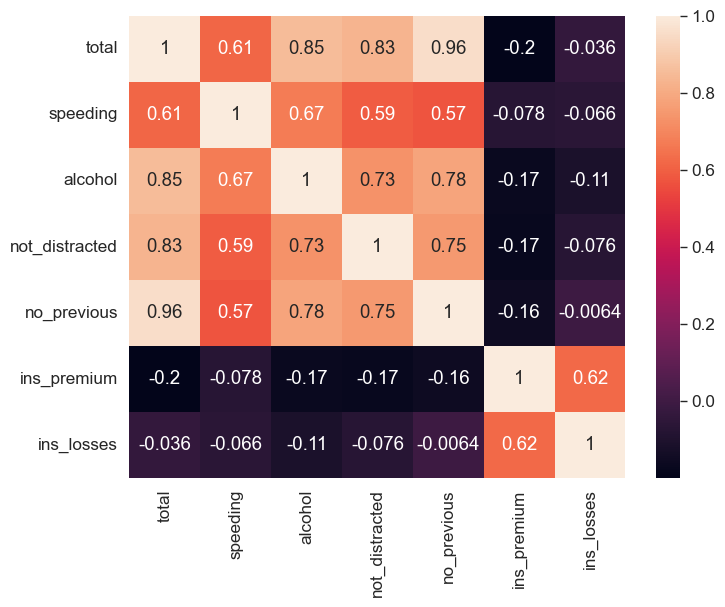

In [65]:
plt.figure(figsize=(8,6))

crash_mx = crash_df.drop(columns='abbrev').corr()
crash_mx

sns.heatmap(crash_mx, annot=True)

### 6.2 ClusterMap

The `seaborn.clustermap` plots a matrix dataset as a hierarchically-clustered heatmap. This function requires scipy to be available. A **clustermap** is a heatmap combined with hierarchical clustering, used to reveal patterns in data. The color-coded matrix represents numerical values, where color intensity indicates magnitude. Dendrograms on the top and left show hierarchical relationships, grouping similar rows and columns together. The data is reordered based on clustering, making it easier to identify patterns and correlations.

For more details, visit the [Seaborn Clustermap Documentation](https://seaborn.pydata.org/generated/seaborn.clustermap.html).

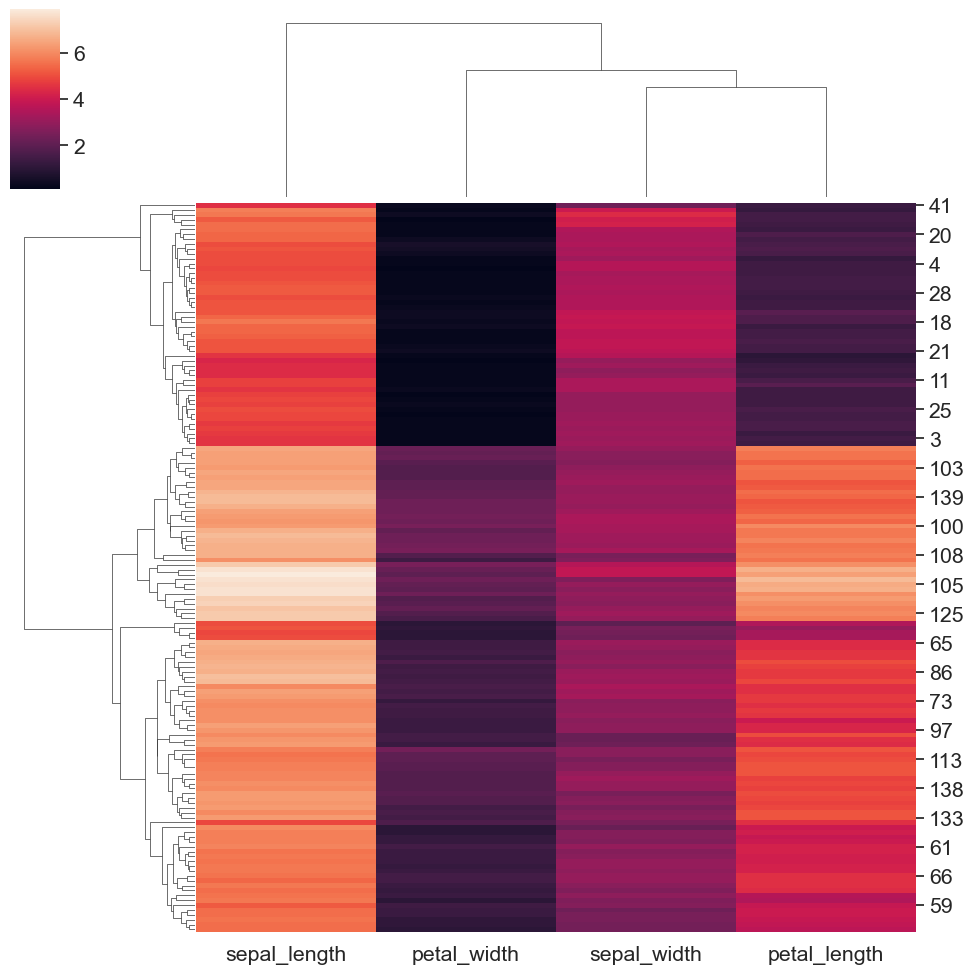

In [58]:
iris = sns.load_dataset('iris')
sns.clustermap(iris.drop('species', axis=1))

### 6.3 PairGrid

The `seaborn.PairGrid` shows subplot grid for plotting pairwise relationships in a dataset. This object maps each variable in a dataset onto a column and row in a grid of multiple axes. Different axes-level plotting functions can be used to draw bivariate plots in the upper and lower triangles, and the marginal distribution of each variable can be shown on the diagonal.

For more details, visit the [Seaborn PairGrid Documentation](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).

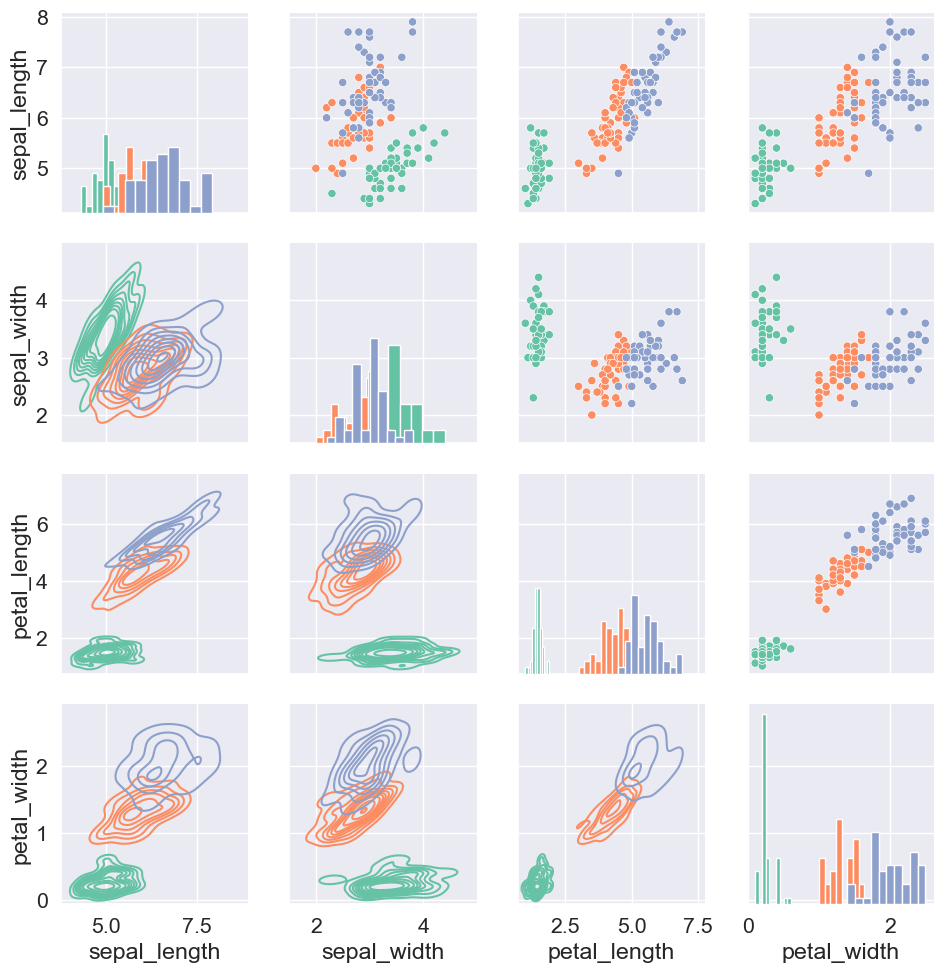

In [59]:
iris_g = sns.PairGrid(iris, hue='species')
iris_g.map_diag(plt.hist)
iris_g.map_upper(sns.scatterplot)
iris_g.map_lower(sns.kdeplot)

### 6.4 FacetGrid

The `seaborn.FacetGrid` performs a multi-plot grid for plotting conditional relationships. This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to levels of variables in the dataset. The plots it produces are often called “lattice”, “trellis”, or “small-multiple” graphics.

For more details, visit the [Seaborn FacetGrid Documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html).

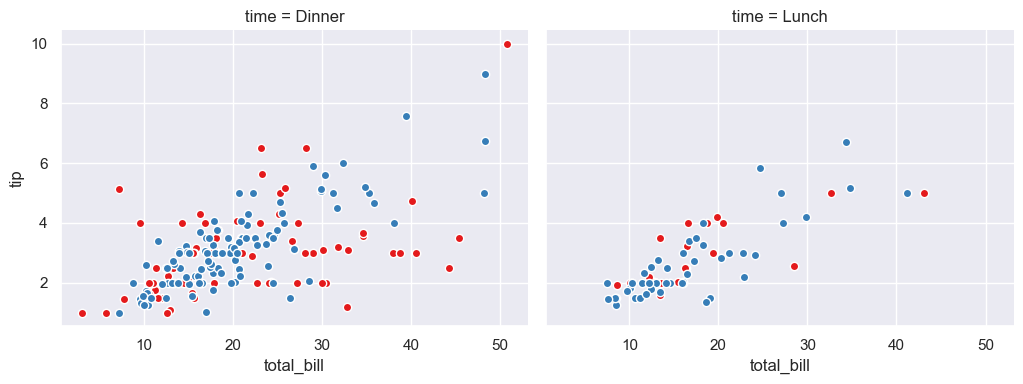

In [60]:
sns.set_context('notebook', font_scale=1)

tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3, col_order=['Dinner', 'Lunch'], palette='Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='w')

## 7. Regression Plots

Regression plots are visualization tools that help illustrate the relationship between variables and fit statistical models to data. These plots are essential for understanding correlations, trends, and making predictions based on data patterns. They provide a visual representation of how one variable changes with respect to another while displaying the fitted model alongside the raw data.

This section covers regression visualization techniques in Seaborn:

- **Linear Model Plot (lmplot)**: Combines regression models with faceting capabilities to show relationships across different subsets of data

Regression plots are particularly valuable for identifying linear and non-linear relationships, detecting outliers that influence model fit, comparing regression models across different categories, and visualizing confidence intervals around regression estimates. These visualizations form the foundation for predictive modeling and statistical inference in data analysis workflows.

### 7.1 Linear Model Plot

The `seaborn.lmplot` plots data and regression model fits across a FacetGrid. This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

For more details, visit the [Seaborn Linear Model Plot Documentation](https://seaborn.pydata.org/generated/seaborn.lmplot.html).

In [61]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 800x600 with 0 Axes>

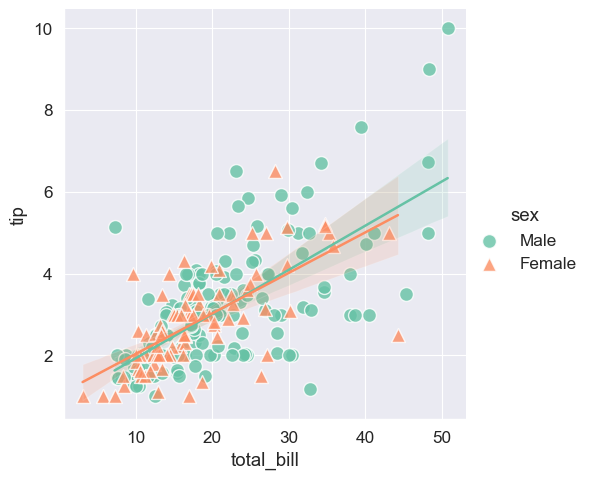

In [62]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale = 1.4)
sns.lmplot(tips_df, x='total_bill', y='tip', hue='sex', markers=['o','^'], scatter_kws={'s':100, 'edgecolor': 'w'})

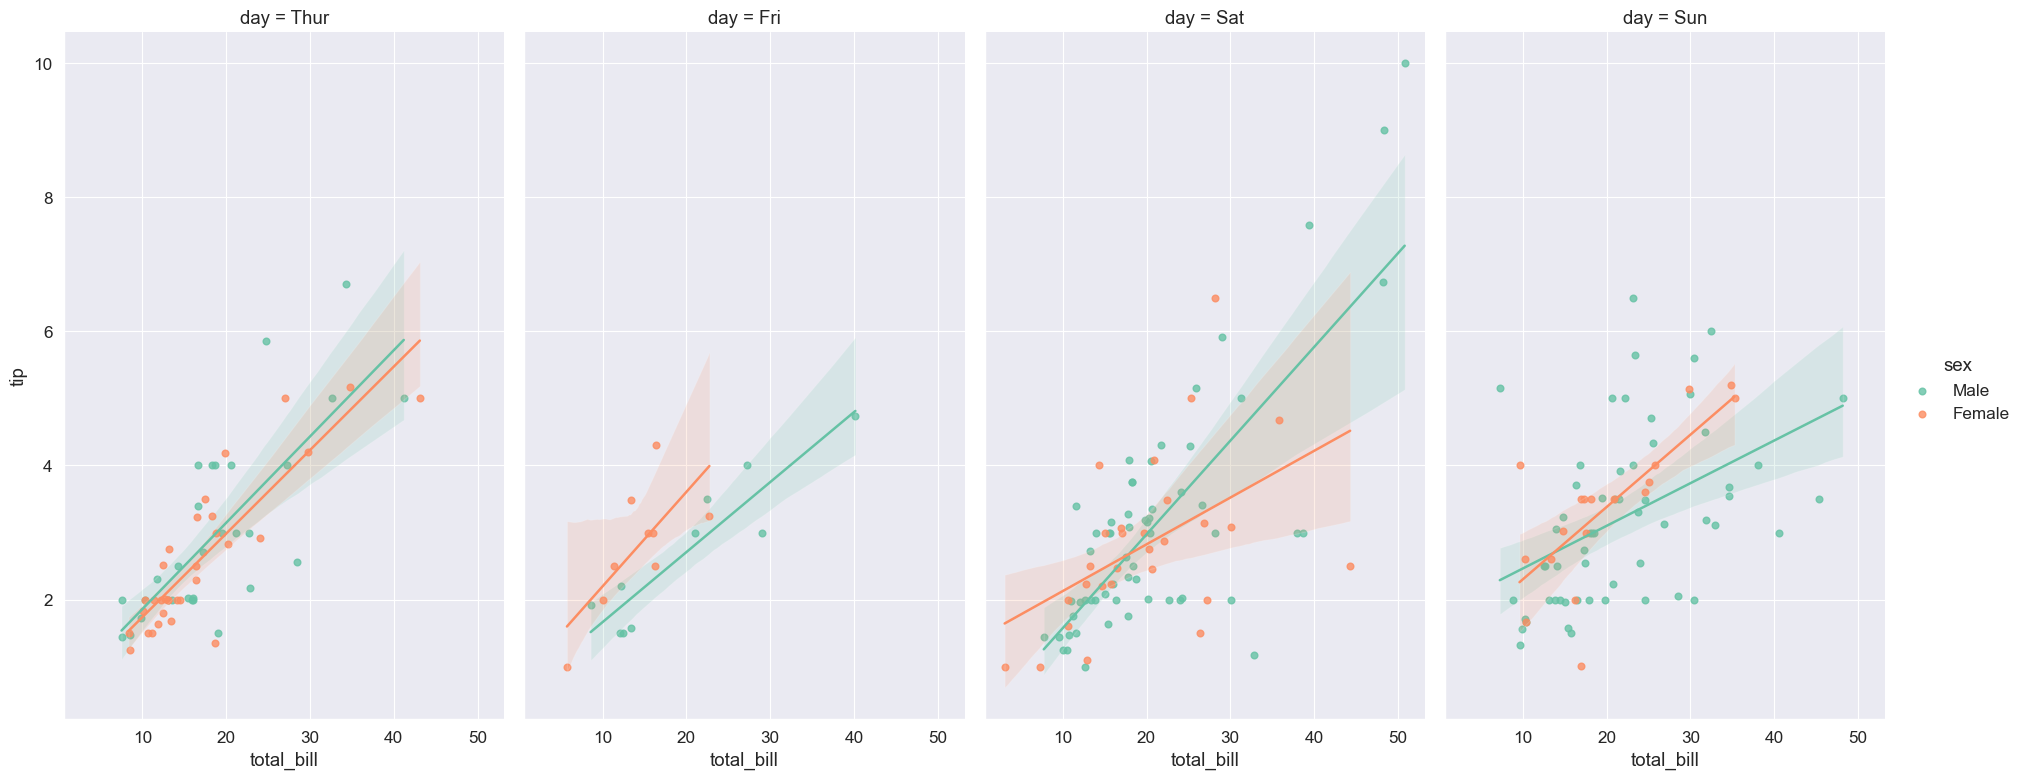

In [63]:
sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6)